## Yüz Duygu Tanıma, derin öğrenme projeleri için popüler bir sınıflandırma veri kümesidir. Bu projenin amacı, veri setindeki yüz görüntülerini analiz etmek ve her görüntüyü karşılık gelen duyguya göre sınıflandırmaktır.

## Veri Kümesi Bilgileri
### Projenin amacı, yüz görüntü veri setini kullanarak yüz ifadesini tespit etmektir. Görüntüleri sınıflandırmak için Konvolüsyonel Sinir Ağı kullanılmaktadır. Çıktı sınıfı kızgın, tiksinti, korku, mutlu, tarafsız, üzgün, şaşırmış olmak üzere 7 farklı türden oluşmaktadır.

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import random
from tqdm.notebook import tqdm
warnings.filterwarnings('ignore')
%matplotlib inline

import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import load_img
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

pandas: Veri analizi ve işleme kütüphanesi.
numpy: Sayısal hesaplamalar için bir kütüphane.
os: İşletim sistemi işlemleri için bir kütüphane.
matplotlib: Grafik çizimi ve veri görselleştirme için bir kütüphane.
seaborn: Veri görselleştirme için bir başka kütüphane.
warnings: Uyarı mesajlarını yönetmek için bir kütüphane.
random: Rasgele sayı üretimi için bir kütüphane.
tqdm: İterasyon işlemlerini takip etmek için bir kütüphane.
Bu kütüphanelerin yanı sıra, bu kod bloğu TensorFlow ve Keras kütüphanelerini de içerir. Bunlar, makine öğrenimi ve derin öğrenme modelleri oluşturmak ve eğitmek için kullanılır.

warnings.filterwarnings('ignore') kod satırı, programın çalışması sırasında ortaya çıkabilecek bazı uyarı mesajlarının görmezden gelinmesini sağlar.

%matplotlib inline satırı, grafiklerin Jupyter defterinde doğrudan görüntülenmesini sağlar.

In [2]:
EGITIM_KLASOR_YOLU = '/content/drive/MyDrive/Colab Notebooks/yuz duygu tanıma/train'
TEST_KLASOR_YOLU = '/content/drive/MyDrive/Colab Notebooks/yuz duygu tanıma/test'

In [3]:
def veri_kumesi_yukle(klasor_yolu):
    goruntu_yollari = []
    etiketler = []
    
    for etiket in os.listdir(klasor_yolu):
        for dosya_adi in os.listdir(os.path.join(klasor_yolu, etiket)):
            goruntu_yolu = os.path.join(klasor_yolu, etiket, dosya_adi)
            goruntu_yollari.append(goruntu_yolu)
            etiketler.append(etiket)
            
        print(etiket, "tamamlandı.")
    
    return goruntu_yollari, etiketler

In [4]:
# Boş bir veri çerçevesi oluştur
train = pd.DataFrame()

# load_dataset() fonksiyonunu kullanarak veri kümelerini yükle
train['resim'], train['etiket'] = veri_kumesi_yukle(EGITIM_KLASOR_YOLU)

# Verileri karıştır
train = train.sample(frac=1).reset_index(drop=True)

# Veri çerçevesinin ilk beş gözlemini göster
train.head()

iğrenme tamamlandı.
korku tamamlandı.
sinirli tamamlandı.
üzgün tamamlandı.
sürpriz tamamlandı.
mutlu tamamlandı.
normal tamamlandı.


,resim,etiket
0,/content/drive/MyDrive/Colab Notebooks/yuz duy...,üzgün
1,/content/drive/MyDrive/Colab Notebooks/yuz duy...,mutlu
2,/content/drive/MyDrive/Colab Notebooks/yuz duy...,mutlu
3,/content/drive/MyDrive/Colab Notebooks/yuz duy...,korku
4,/content/drive/MyDrive/Colab Notebooks/yuz duy...,sürpriz


In [5]:
test = pd.DataFrame()
test['resim'], test['etiket'] = veri_kumesi_yukle(TEST_KLASOR_YOLU)
test.head()

iğrenme tamamlandı.
korku tamamlandı.
üzgün tamamlandı.
sinirli tamamlandı.
mutlu tamamlandı.
normal tamamlandı.
sürpriz tamamlandı.


,resim,etiket
0,/content/drive/MyDrive/Colab Notebooks/yuz duy...,iğrenme
1,/content/drive/MyDrive/Colab Notebooks/yuz duy...,iğrenme
2,/content/drive/MyDrive/Colab Notebooks/yuz duy...,iğrenme
3,/content/drive/MyDrive/Colab Notebooks/yuz duy...,iğrenme
4,/content/drive/MyDrive/Colab Notebooks/yuz duy...,iğrenme


<Axes: xlabel='etiket', ylabel='count'>

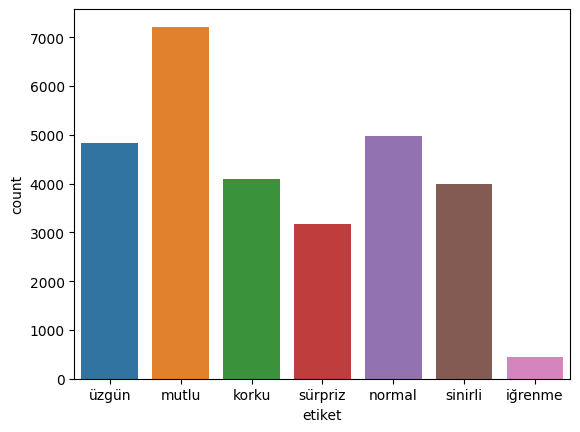

In [6]:
sns.countplot(x=train['etiket'])

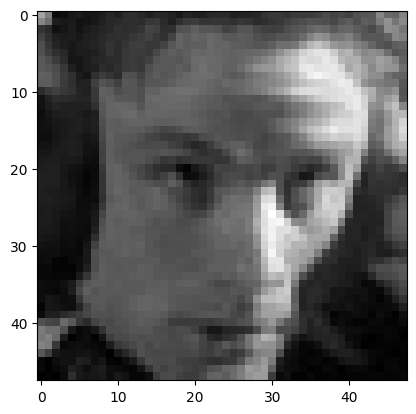

In [7]:
from PIL import Image
img = Image.open(train['resim'][0])
plt.imshow(img, cmap='gray')

In [8]:
def özellik_çıkar(images):
  özellikler = []
  for image in tqdm(images):
      img = load_img(image, grayscale=True)
      img = np.array(img)
      özellikler.append(img)
  özellikler = np.array(özellikler)
  özellikler = özellikler.reshape(len(özellikler), 48, 48, 1)
  return özellikler

Kod, önce "load_img" fonksiyonunu kullanarak resimleri yükler. Bu fonksiyon, bir resmi yüklemek için keras kütüphanesinde bulunur.

Sonrasında, yüklenen resimler numpy dizilerine dönüştürülür ve her bir resim için bir özellik vektörü oluşturulur. Bu özellik vektörleri, "features" adlı bir diziye eklenir.

En son olarak, özellik vektörleri numpy dizilerine dönüştürülür ve boyutları 48x48 piksel boyutunda, tek kanallı (gri tonlamalı) resimler halinde yeniden şekillendirilir. Daha sonra, bu özellikler başka bir modele verilerek sınıflandırma veya tanıma işlemi gerçekleştirilebilir.

In [9]:
train_features = özellik_çıkar(train['resim'])
test_features = özellik_çıkar(test['resim'])

  0%|          | 0/28709 [00:00<?, ?it/s]

  0%|          | 0/7178 [00:00<?, ?it/s]

In [10]:
x_train = train_features/255.0
x_test = test_features/255.0

In [13]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(train['etiket'])
y_train = le.transform(train['etiket'])
y_test = le.transform(test['etiket'])

In [14]:
y_train = to_categorical(y_train, num_classes=7)
y_test = to_categorical(y_test, num_classes=7)

In [15]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [16]:
input_shape = (48, 48, 1)
output_class = 7

In [17]:
model = Sequential()

model.add(Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(output_class, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics='accuracy')

İlk olarak, dört adet evrişimli katman (Conv2D) ekleniyor. Her katmanın farklı bir boyutu ve aktivasyon fonksiyonu var. Çıkış özellikleri (output features) 128, 256, 512 ve 512 olarak sıralanmıştır. Bu katmanların amacı, verilen girdi görüntülerinin özelliklerini çıkarmaktır.

Her evrişimli katmandan sonra bir MaxPooling2D katmanı eklenir. Bu katman, özellik haritasını küçültmek için öznitelikleri alt örnekleme ile bir araya getirir. Bu aşama, modelin daha hızlı eğitilmesine ve daha az hesaplama maliyetiyle daha iyi sonuçlar elde etmesine yardımcı olur.

Daha sonra, her evrişimli katmandan sonra bir Dropout katmanı eklenir. Dropout, aşırı öğrenmeyi azaltmaya yardımcı olan bir regularizasyon tekniğidir. Dropout, belirli bir olasılıkla (bu durumda 0.4) birimleri rastgele sıfıra ayarlar.

Flatten katmanı, son öznitelik haritasını bir vektöre dönüştürür.

Ardından, iki tamamen bağlı (Dense) katman eklenir. Her katmanın aktivasyon fonksiyonu ReLU'dur ve bir Dropout katmanı ile birlikte kullanılır. Çıkış sınıfı sayısı, son olarak bir softmax aktivasyon fonksiyonlu bir çıkış katmanı ile belirlenir.

Son olarak, model, 'adam' optimize edici ve 'categorical_crossentropy' kayıp fonksiyonu kullanılarak derlenir. 'accuracy' ölçütü olarak belirlenir.

Bu model bir görüntü sınıflandırma modelidir ve 'adam' optimize edicisi, 'categorical_crossentropy' kayıp fonksiyonu ve 'accuracy' metriği kullanarak eğitilir.

In [18]:
history = model.fit(x=x_train, y=y_train, batch_size=128, epochs=100, validation_data=(x_test, y_test))

Epoch 1/100
225/225 [==============================] - 28s 58ms/step - loss: 1.8208 - accuracy: 0.2498 - val_loss: 1.8070 - val_accuracy: 0.2549
Epoch 2/100
225/225 [==============================] - 12s 54ms/step - loss: 1.7784 - accuracy: 0.2631 - val_loss: 1.6946 - val_accuracy: 0.3027
Epoch 3/100
225/225 [==============================] - 12s 54ms/step - loss: 1.6713 - accuracy: 0.3288 - val_loss: 1.5349 - val_accuracy: 0.4037
Epoch 4/100
225/225 [==============================] - 12s 54ms/step - loss: 1.5629 - accuracy: 0.3871 - val_loss: 1.4424 - val_accuracy: 0.4342
Epoch 5/100
225/225 [==============================] - 12s 54ms/step - loss: 1.4831 - accuracy: 0.4240 - val_loss: 1.3732 - val_accuracy: 0.4694
Epoch 6/100
225/225 [==============================] - 12s 55ms/step - loss: 1.4261 - accuracy: 0.4474 - val_loss: 1.3180 - val_accuracy: 0.4890
Epoch 7/100
225/225 [==============================] - 12s 53ms/step - loss: 1.3833 - accuracy: 0.4687 - val_loss: 1.2849 - val_ac

In [19]:
model.save('my_model.h5')

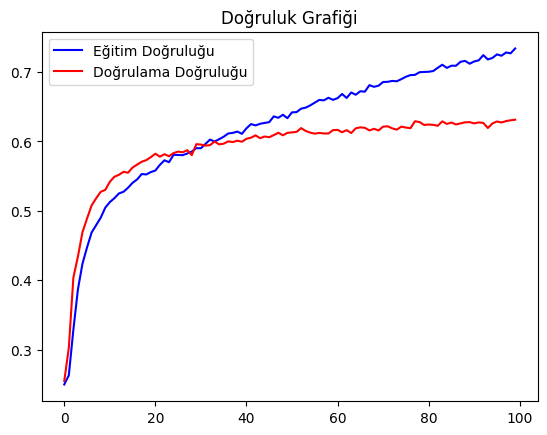

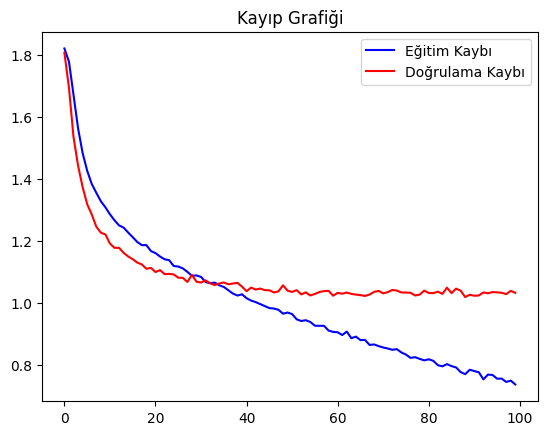

In [20]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Eğitim Doğruluğu')
plt.plot(epochs, val_acc, 'r', label='Doğrulama Doğruluğu')
plt.title('Doğruluk Grafiği')
plt.legend()
plt.figure()

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

plt.plot(epochs, loss, 'b', label='Eğitim Kaybı')
plt.plot(epochs, val_loss, 'r', label='Doğrulama Kaybı')
plt.title('Kayıp Grafiği')
plt.legend()

plt.show()

Orijinal Çıktı: mutlu
1/1 [==============================] - 0s 295ms/step
Tahmin Edilen Çıktı: mutlu


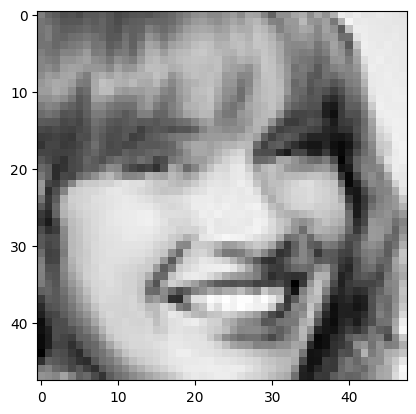

In [21]:
image_index = random.randint(0, len(test))
print("Orijinal Çıktı:", test['etiket'][image_index])
pred = model.predict(x_test[image_index].reshape(1, 48, 48, 1))
prediction_label = le.inverse_transform([pred.argmax()])[0]
print("Tahmin Edilen Çıktı:", prediction_label)
plt.imshow(x_test[image_index].reshape(48, 48), cmap='gray');

Orijinal Çıktı: mutlu
1/1 [==============================] - 0s 24ms/step
Tahmin Edilen Çıktı: mutlu


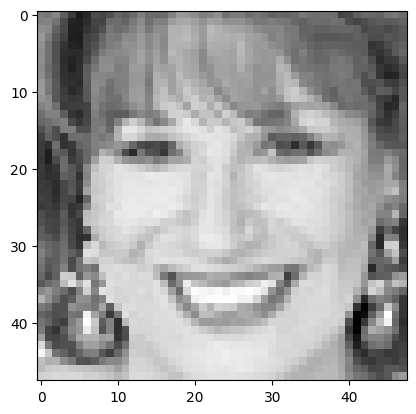

In [22]:
image_index = random.randint(0, len(test))
print("Orijinal Çıktı:", test['etiket'][image_index])
pred = model.predict(x_test[image_index].reshape(1, 48, 48, 1))
prediction_label = le.inverse_transform([pred.argmax()])[0]
print("Tahmin Edilen Çıktı:", prediction_label)
plt.imshow(x_test[image_index].reshape(48, 48), cmap='gray');

Orijinal Çıktı: normal
1/1 [==============================] - 0s 19ms/step
Tahmin Edilen Çıktı: normal


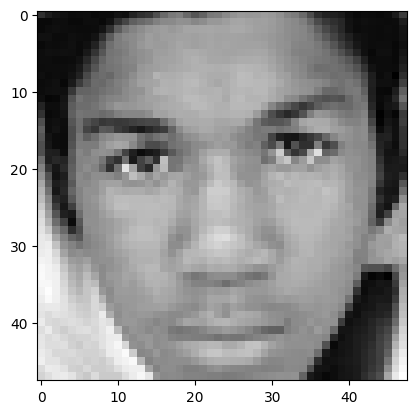

In [25]:
image_index = random.randint(0, len(test))
print("Orijinal Çıktı:", test['etiket'][image_index])
pred = model.predict(x_test[image_index].reshape(1, 48, 48, 1))
prediction_label = le.inverse_transform([pred.argmax()])[0]
print("Tahmin Edilen Çıktı:", prediction_label)
plt.imshow(x_test[image_index].reshape(48, 48), cmap='gray');

Orijinal Çıktı: mutlu
1/1 [==============================] - 0s 28ms/step
Tahmin Edilen Çıktı: mutlu


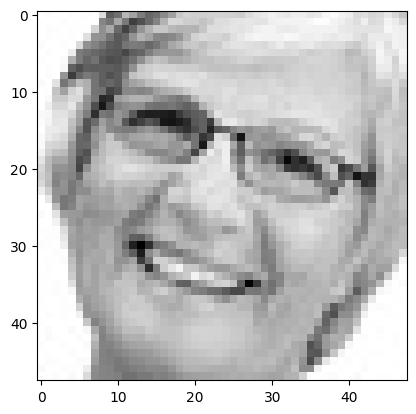

In [26]:
image_index = random.randint(0, len(test))
print("Orijinal Çıktı:", test['etiket'][image_index])
pred = model.predict(x_test[image_index].reshape(1, 48, 48, 1))
prediction_label = le.inverse_transform([pred.argmax()])[0]
print("Tahmin Edilen Çıktı:", prediction_label)
plt.imshow(x_test[image_index].reshape(48, 48), cmap='gray');

Orijinal Çıktı: korku
1/1 [==============================] - 0s 20ms/step
Tahmin Edilen Çıktı: sürpriz


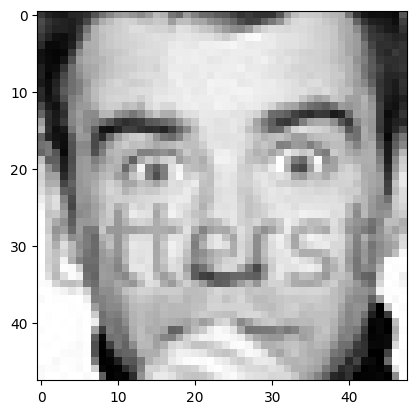

In [27]:
image_index = random.randint(0, len(test))
print("Orijinal Çıktı:", test['etiket'][image_index])
pred = model.predict(x_test[image_index].reshape(1, 48, 48, 1))
prediction_label = le.inverse_transform([pred.argmax()])[0]
print("Tahmin Edilen Çıktı:", prediction_label)
plt.imshow(x_test[image_index].reshape(48, 48), cmap='gray');